# Assignment:Gramener Case Study

In [23]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sns.set(style="ticks", color_codes=True)


The warnings filter controls whether warnings should be ignored, displayed, or turned into errors (raising an exception)

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Reading, Inspection & Cleaning

Import and read the database. Store it in a variable called loan.

In [25]:
loan=pandas.read_csv(r"C:/Users/Ranja/loan.csv", encoding = "ISO-8859-1")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Understanding about the given dataset

#### Metadata description #################### 
Description - The data given contains the information about past loan applicants and whether they ‘defaulted’ or not
This dataset consists of 111 attributes/columns
This dataset consists of 39717 rows


The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

As per the info given, the customers labelled as 'charged-off' are the 'defaulters'. 

# Inspect Null values

Data sets, most of the times end up with lot of invalid, corrupt, or missing values.
This later creates problems while operating that data frame.

While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame. 
Here we are inspecting the Nulls so that they can be handled.

In [26]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [27]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Drop unecessary columns

It is important to be able to deal with large amount of data, which may contain missing values, 
inconsistent formatting, malformed records, or nonsensical outliers.
Cleaning datasets and getting it down to workable format is an important step in the analysis

We found that not all the categories of the given data in a dataset are useful for analysis.
Many columnns contain over 100% Nulls which are not adding value to the analaysis

Distilling the data down & retaining the coulmns that will help in meaningful analysis 

In [28]:
# Used the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mort_acc',
                  'mths_since_recent_bc',
                  'mths_since_recent_bc_dlq',
                  'mths_since_recent_inq',
                  'mths_since_recent_revol_delinq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_sats',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_120dpd_2m',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'pct_tl_nvr_dlq',
                  'percent_bc_gt_75',
                  'tot_hi_cred_lim'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN


Dropping unnecessary columns continued...

In [29]:
loan.shape

(39717, 86)

In [30]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       6.19
emp_length                      2.71
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
loan_status                     0.00
pymnt_plan                      0.00
url                             0.00
desc                           32.58
purpose                         0.00
title                           0.03
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
i

In [31]:
# Used the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['tot_coll_amt',
                  'tot_cur_bal',
                  'open_acc_6m',
                  'open_il_6m',
                  'open_il_12m',
                  'open_il_24m',
                  'mths_since_rcnt_il',
                  'total_bal_il',
                  'il_util',
                  'open_rv_12m',
                  'open_rv_24m',
                  'max_bal_bc',
                  'all_util',
                  'total_rev_hi_lim',
                  'inq_fi',
                  'total_cu_tl',
                  'inq_last_12m',
                  'acc_open_past_24mths',
                  'avg_cur_bal',
                  'bc_open_to_buy',
                  'bc_util',
                  'mo_sin_old_il_acct',
                  'total_bal_ex_mort',
                  'total_bc_limit',
                  'total_il_high_credit_limit'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0


In [32]:
loan.shape

(39717, 61)

In [16]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [33]:
# Used the 'drop()' function to drop the unnecessary columns 
### Dropped 4 Columns with NA values###
loan = loan.drop(['mths_since_last_major_derog',
                  'annual_inc_joint',
                  'dti_joint',
                  'verification_status_joint'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [34]:
loan.shape

(39717, 57)

In [35]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [36]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 4 Columns with NA values###
loan = loan.drop(['next_pymnt_d',
                  'mths_since_last_record',
                  'mths_since_last_delinq',
                  'desc'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [37]:
loan.shape

(39717, 53)

# Inspecting the distributions of some important columns

This is done to plan on handling the given categorical data.

We decided to create the subsets of the data remained after cleansing and work on these subsets.

In [45]:
loan.groupby('term').size()/len(loan.index)*100

term
 36 months    73.258302
 60 months    26.741698
dtype: float64

In [39]:
loan.groupby('home_ownership').size()/len(loan.index)*100

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

In [40]:
loan.groupby('loan_status').size()/len(loan.index)*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

In [46]:
loan.groupby('grade').size()/len(loan.index)*100

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
dtype: float64

In [41]:
loan.groupby('verification_status').size()/len(loan.index)*100

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64

In [42]:
loan.groupby('purpose').size()/len(loan.index)*100

purpose
car                    3.900093
credit_card           12.916383
debt_consolidation    46.934562
educational            0.818289
home_improvement       7.493013
house                  0.959287
major_purchase         5.506458
medical                1.744845
moving                 1.467885
other                 10.053629
renewable_energy       0.259335
small_business         4.602563
vacation               0.959287
wedding                2.384369
dtype: float64

In [52]:
loan.groupby('addr_state').size()/len(loan.index)*100

addr_state
AK     0.201425
AL     1.138052
AR     0.616864
AZ     2.213158
CA    17.873958
CO     1.994108
CT     1.890878
DC     0.538812
DE     0.287031
FL     7.216054
GA     3.519903
HI     0.438100
IA     0.012589
ID     0.015107
IL     3.839666
IN     0.022660
KS     0.682327
KY     0.818289
LA     1.097767
MA     3.373870
MD     2.641186
ME     0.007553
MI     1.812826
MN     1.548455
MO     1.727220
MS     0.047838
MT     0.214014
NC     1.984037
NE     0.012589
NH     0.430546
NJ     4.657955
NM     0.475867
NV     1.251353
NY     9.597905
OH     3.079286
OK     0.752826
OR     1.135534
PA     3.819523
RI     0.498527
SC     1.188408
SD     0.161140
TN     0.042803
TX     6.866077
UT     0.649596
VA     3.542564
VT     0.135962
WA     2.114963
WI     1.158194
WV     0.445653
WY     0.208979
dtype: float64

### Crosschecking the Excel sheet after data cleaning

In [53]:
loan.to_csv(r"C:\Users\Ranja\Downloads\loan_Check1.csv",sep='\t', encoding='utf-8')

###  Creating Simple countplots

	Here we are trying to see from the given data set the impact of home ownership on the distribution of loan grades.

	In general, in the banking sector there is a strong correlation between the home ownership and the grading of the loan given to the customer by the bank.


	The home ownership status is a strong indictor of the ability of the customer to repay the amount owed to the bank.


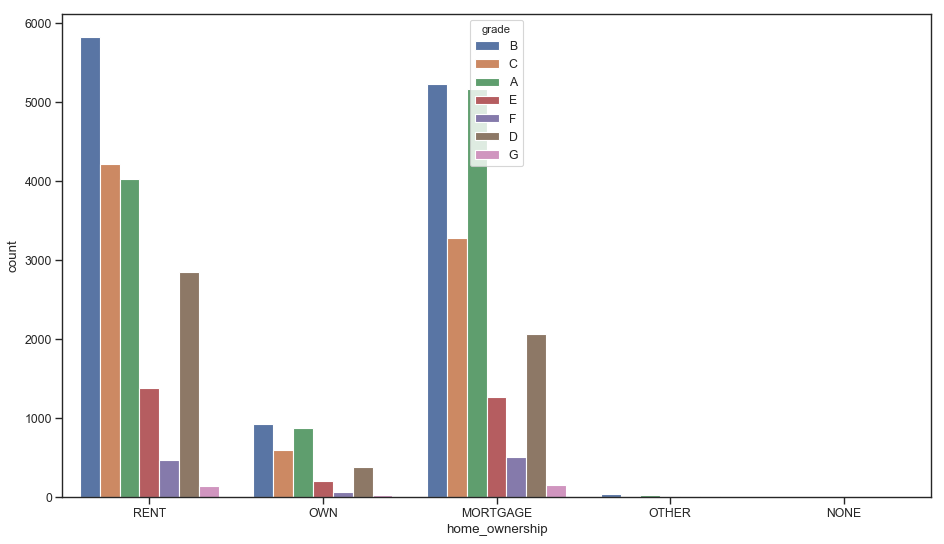

In [54]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "home_ownership", hue = "grade", data = loan)

Obeservation: Most loans of grade B are given to customers staying in a rented house
followed by customers owning a property.

Loans of grade A are given to customers with Mortgage, followed by customers staying in a rented house

	Here we are trying to see from the given data set the impact of loan status on the distribution of loan grades.

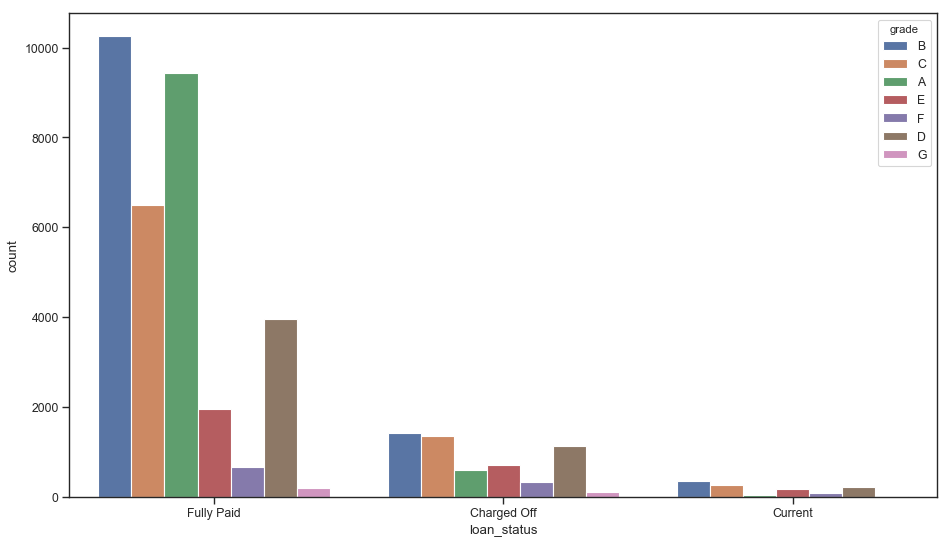

In [58]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "grade", data = loan)

Obeservation: Most loans of grade B are charged off/'Defaulters' followed by grade C

Grade D has higher charged off/'Defaulters' than grade E

Grades A, F & G show the lower number of charged off/'Defaulters'


	Here we are trying to see from the given data set the impact of loan status on the distribution of home ownership.

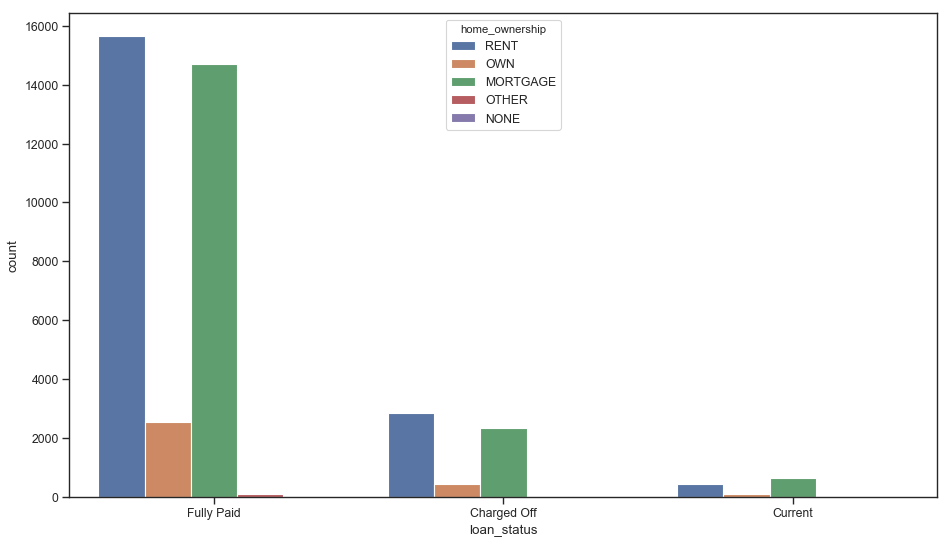

In [59]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "home_ownership", data = loan)

Obeservation: Most loans of customers staying in a rented house are charged off/'Defaulters'

followed by customers having a mortgage property

	Here we are trying to see from the given data set the impact of loan status on the distribution 
of purpose for which loan has been taken from the bank.

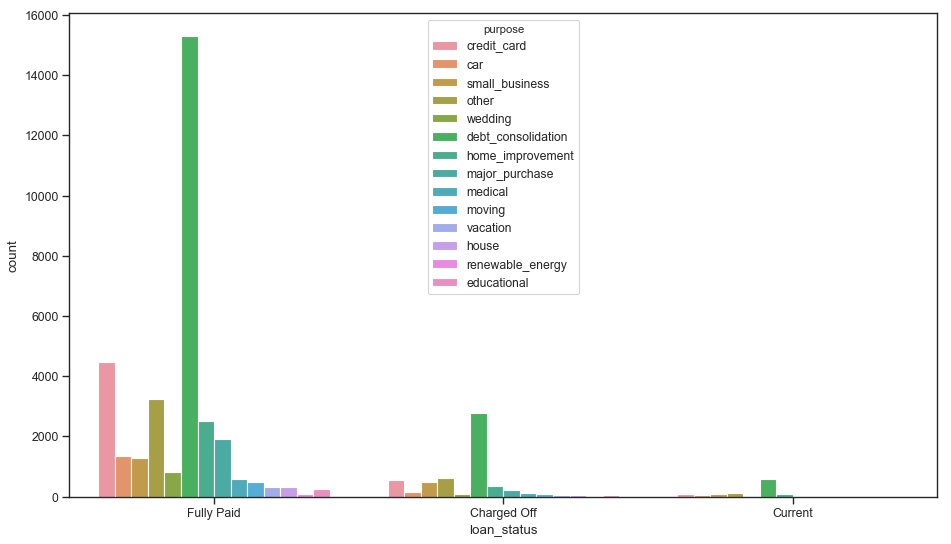

In [60]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "purpose", data = loan)

Obeservation: Most loans of customers under charged off/'Defaulters' are for debt consolidation

Followed by Credit card, other & home improvement customers are under charged off/'Defaulters'

# Bucketing helps in performing operations faster for univariate, bivariate analysis 

	The data set contains lot of information’s in indiviual columns which is in numeric forms.

	This information consists of a wide spectrum/range of data.

	This makes is essential to segment/bucket the numeric data in different slots of a specific 
range.

	This was done to get better insights of segmented univariate, bivariate analysis.


### Bucketing the annual salary 

We are segmenting the annual salary column with if-else condition &  lambda function

In [66]:
def salary_bracket(x):
    'Dividing the salary into following categories'
    if x < 300001:
        return "Bracket_1"
    elif 300001 <= x < 400001:
        return "Bracket_2"    
    elif 400001 <= x < 600001:
        return "Bracket_3"    
    elif 600001 <= x < 800001:
        return "Bracket_4"
    elif 800001 <= x < 1000001:
        return "Bracket_5"
    else:
        return "Bracket_6"

In [67]:
loan['Annual_Sal'] = loan.annual_inc.apply(lambda x: salary_bracket(x))

In [68]:
loan.Annual_Sal.value_counts()

Bracket_1    39542
Bracket_2       83
Bracket_3       43
Bracket_4       27
Bracket_6       14
Bracket_5        8
Name: Annual_Sal, dtype: int64

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts. 

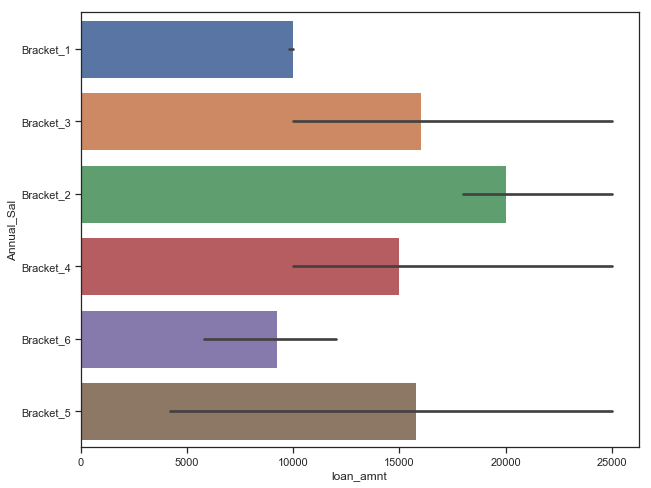

In [69]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Annual_Sal", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 2 have higher loan amount

Followed by customers under bracket 3 of annual income. 

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts along with the home ownership status of the customers. 

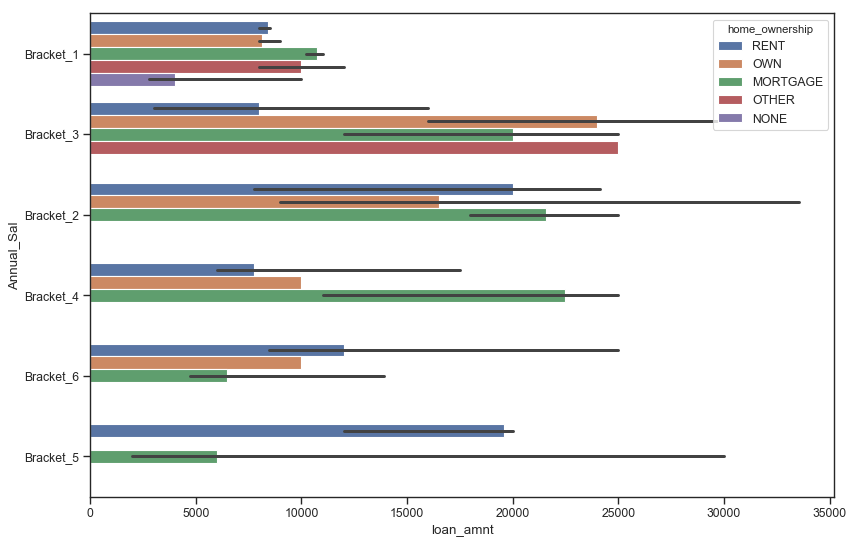

In [70]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='Annual_Sal', hue="home_ownership", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 3 stay in own property

Followed by customers under bracket 3 with Other as the home stauts

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts along with the loan status of the customers. 

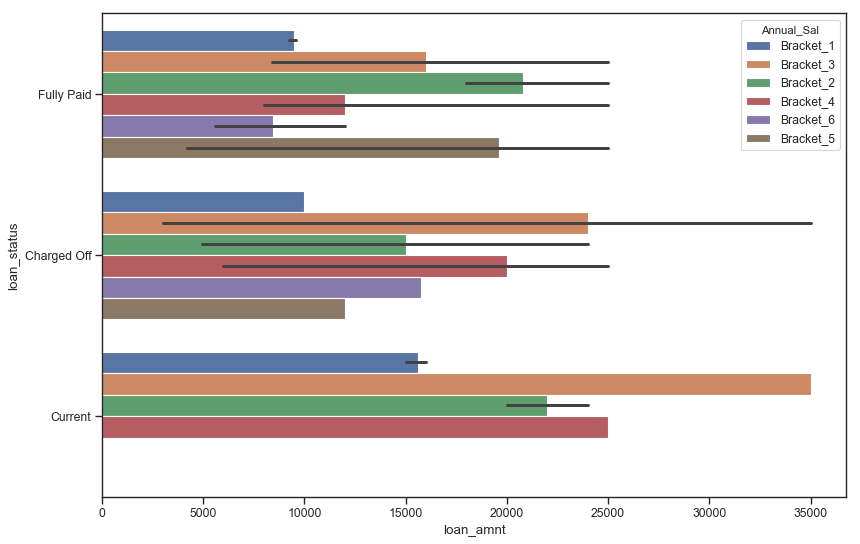

In [47]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='loan_status', hue="Annual_Sal", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 3 show status as 'charged-off' / 'defaulters'

Followed by customers under bracket 4

### Bucketing the loan amount 

We are segmenting the loan amount column with if-else condition &  lambda function

In [71]:
def Loan_amt_bracket(x):
    'Dividing the loan amount into following categories'
    if x < 5001:
        return "Loan_Bracket_1"
    elif 5001 <= x < 10001:
        return "Loan_Bracket_2"    
    elif 10001 <= x < 15001:
        return "Loan_Bracket_3"    
    elif 15001 <= x < 20001:
        return "Loan_Bracket_4"
    elif 20001 <= x < 30001:
        return "Loan_Bracket_5"
    else:
        return "Loan_racket_6"

In [72]:
loan['Loan_amt_bracket'] = loan.loan_amnt.apply(lambda x: Loan_amt_bracket(x))

In [50]:
loan.Loan_amt_bracket.value_counts()

Loan_Bracket_2    12960
Loan_Bracket_1     9568
Loan_Bracket_3     7986
Loan_Bracket_4     4591
Loan_Bracket_5     3784
Loan_racket_6       828
Name: Loan_amt_bracket, dtype: int64

	Here we are trying to see the impact of loan amount segments on the distribution of loan amounts. 

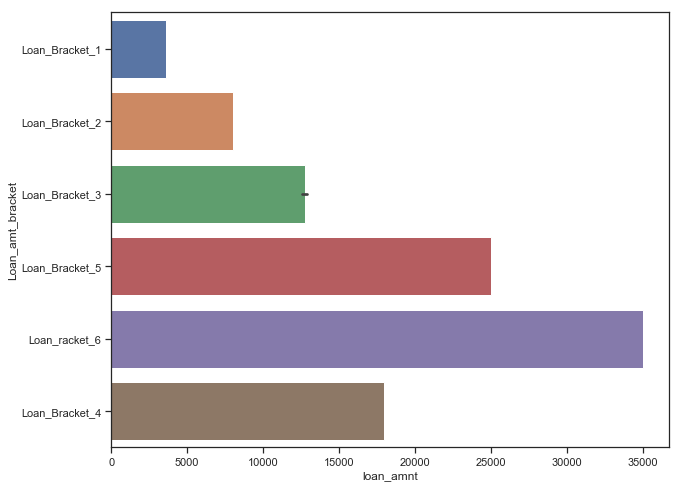

In [78]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Loan_amt_bracket", data=loan, estimator=np.median)
plt.show()

Here we are trying to see the impact of loan amount segments of on the distribution of loan amounts along with loan status.

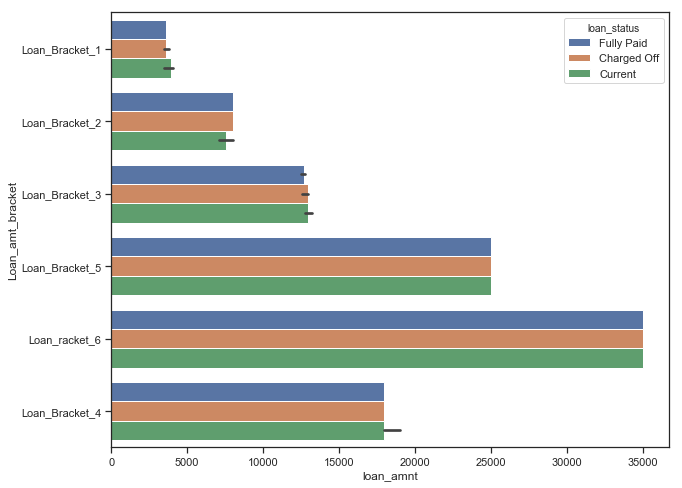

In [81]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Loan_amt_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under loan bracket 6 show status as 'charged-off' / 'defaulters'

Followed by customers under loan bracket 5

### Bucketing the int rate 

We are segmenting the intrest rate column with if-else condition & lambda function

In [83]:
loan['int_rate']=loan['int_rate'].str.replace('%','',regex=True)

In [84]:
loan['int_rate']=loan['int_rate'].apply(pandas.to_numeric)

In [85]:
def Int_rate_bracket(x):
    'Dividing the Intrest rate into following categories'
    if x < 6:
        return "Int_Bracket_1"
    elif 6 <= x < 10:
        return "Int_Bracket_2"    
    elif 10 <= x < 14:
        return "Int_Bracket_3"    
    elif 14 <= x < 16:
        return "Int_Bracket_4"
    elif 16 <= x < 20:
        return "Int_Bracket_5"
    else:
        return "Int_racket_6"

In [86]:
loan['Int_amt_bracket'] = loan.int_rate.apply(lambda x: Int_rate_bracket(x))

In [87]:
loan.Int_amt_bracket.value_counts()

Int_Bracket_3    16296
Int_Bracket_2    10812
Int_Bracket_4     5315
Int_Bracket_5     5092
Int_Bracket_1     1330
Int_racket_6       872
Name: Int_amt_bracket, dtype: int64

Here we are trying to see the impact of Intrest rate segments on the distribution of loan amounts. 

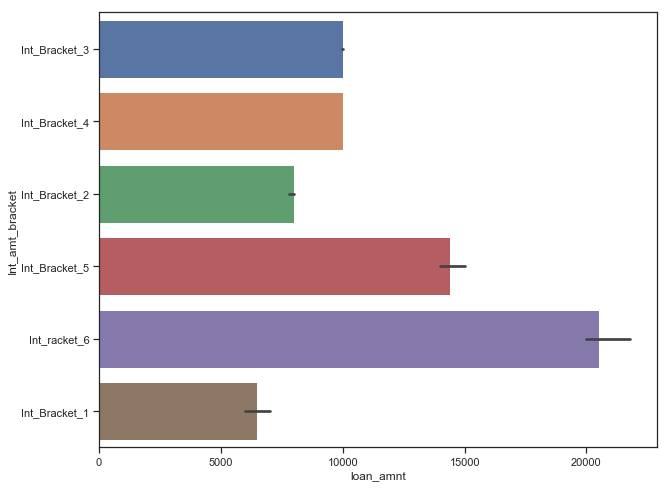

In [57]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Int_amt_bracket", data=loan, estimator=np.median)
plt.show()

Here we are trying to see the impact of Intrest rate segments on the distribution of loan amounts along with loan status.

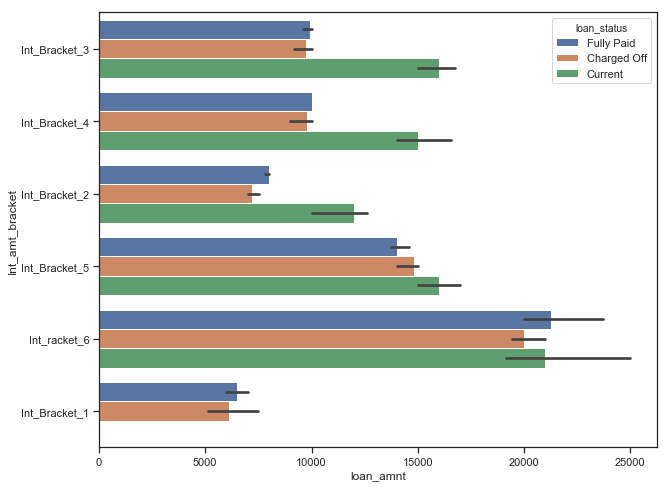

In [91]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Int_amt_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under Intrest rate bracket 6 show status as 'charged-off' / 'defaulters'

Followed by customers under intrest rate bracket 5

### Bucketing the term

We are segmenting the term column with if-else condition & lambda function

In [92]:
loan['term']=loan['term'].str.replace('months','',regex=True)

In [93]:
loan['term']=loan['term'].apply(pandas.to_numeric)

In [94]:
def Term_bracket(x):
    'divide the Term into following categories'
    if x < 37:
        return "Term_Bracket_1"
    else:
        return "Term_Bracket_2"

In [95]:
loan['Term_bracket'] = loan.term.apply(lambda x: Term_bracket(x))

In [96]:
loan.Term_bracket.value_counts()

Term_Bracket_1    29096
Term_Bracket_2    10621
Name: Term_bracket, dtype: int64

Here we are trying to see the impact of Term segments on the distribution of loan amounts.

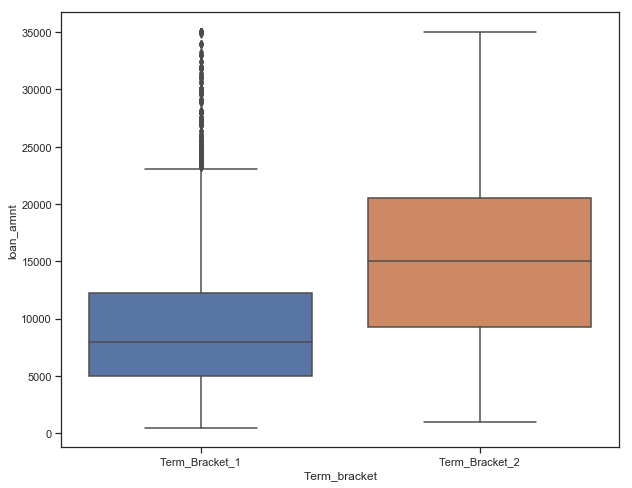

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Term_bracket', y='loan_amnt', data=loan)
plt.show()

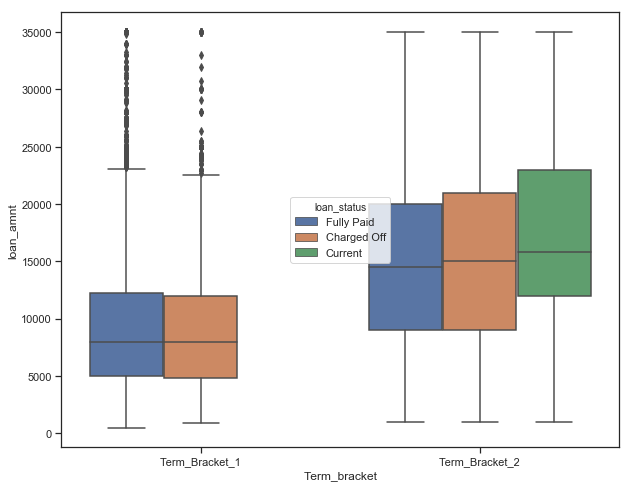

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Term_bracket', y='loan_amnt',hue="loan_status", data=loan)
plt.show()

### Bucketing the installements

We are segmenting the installment column with if-else condition & lambda function

In [100]:
loan['installment']=loan['installment'].apply(pandas.to_numeric)

In [101]:
def Installament_bracket(x):
    'Dividing Intrest rate into following categories'
    if x < 100:
        return "Install_1"
    elif 100 <= x < 200:
        return "Install_2"    
    elif 200 <= x < 300:
        return "Install_3"    
    elif 300 <= x < 400:
        return "Install_4"
    elif 400 <= x < 500:
        return "Install_5"
    elif 500 <= x < 600:
        return "Install_6"    
    elif 600 <= x < 700:
        return "Install_7"    
    elif 700 <= x < 800:
        return "Install_8"
    elif 800 <= x < 900:
        return "Install_9"
    else:
        return "Install_10"

In [102]:
loan['Installament_bracket'] = loan.installment.apply(lambda x: Installament_bracket(x))

In [103]:
loan.Installament_bracket.value_counts()

Install_2     9249
Install_3     7814
Install_4     7357
Install_5     4125
Install_1     4032
Install_6     2750
Install_7     1893
Install_9     1074
Install_8      879
Install_10     544
Name: Installament_bracket, dtype: int64

Here we are trying to see the impact of installment segments on the distribution of loan amounts.

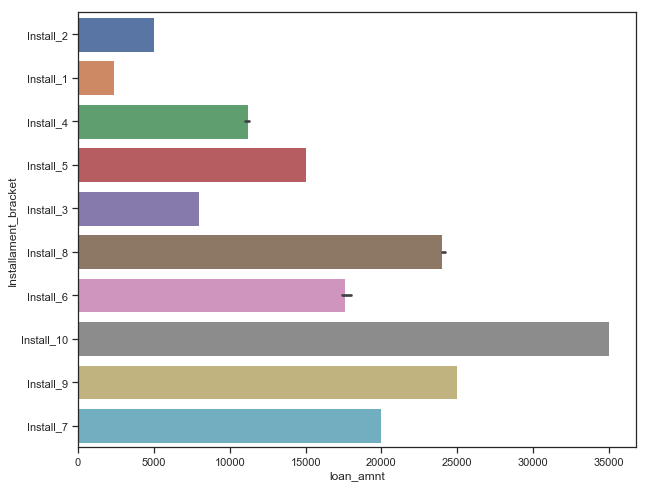

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Installament_bracket", data=loan, estimator=np.median)
plt.show()

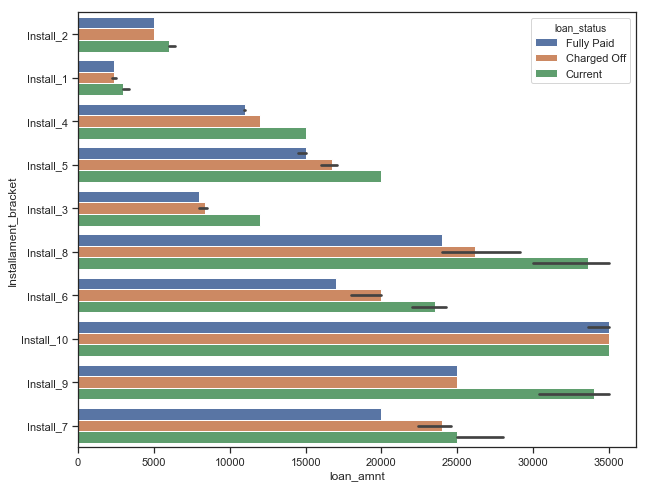

In [104]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Installament_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

In [105]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Term_bracket,Installament_bracket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_1,Install_2
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_2,Install_1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_1,Install_1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Term_Bracket_1,Install_4
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_2,Install_1


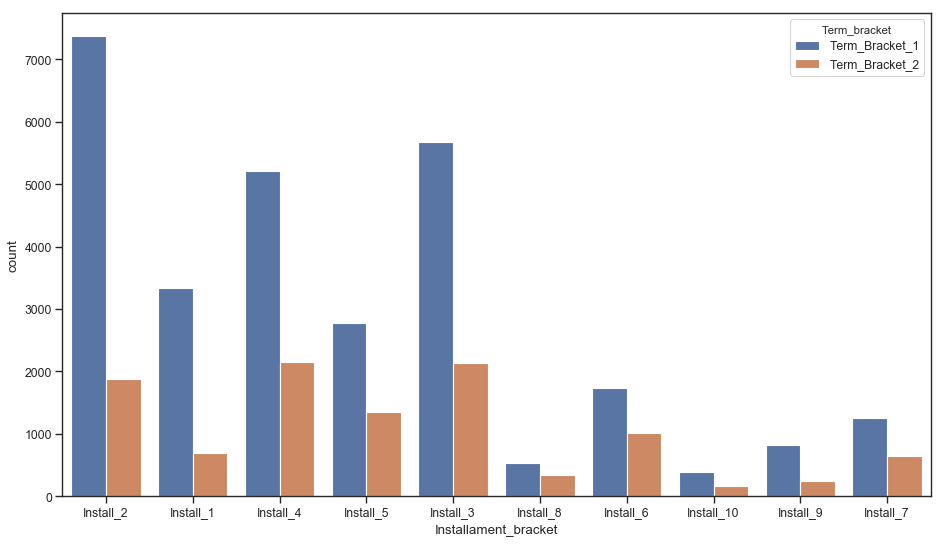

In [106]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "Installament_bracket", hue = "Term_bracket", data = loan)

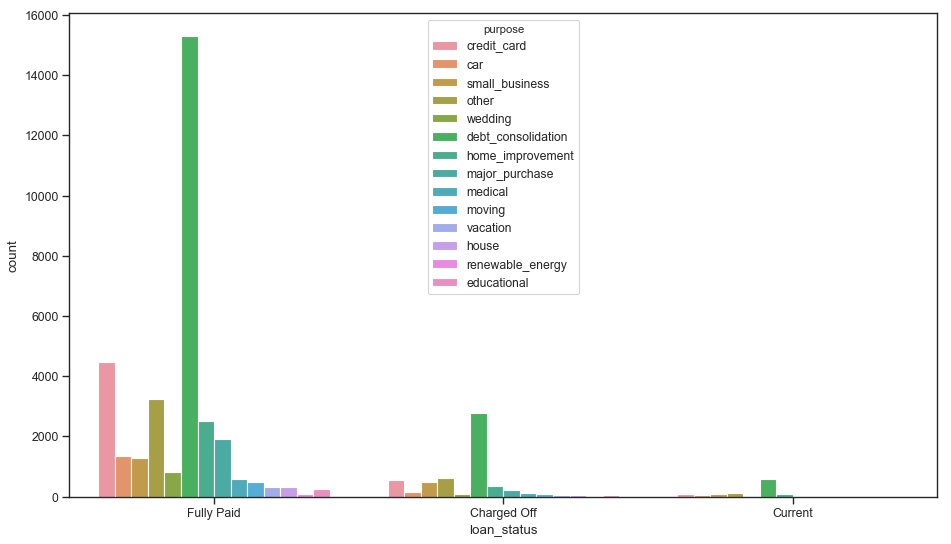

In [107]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "purpose", data = loan)

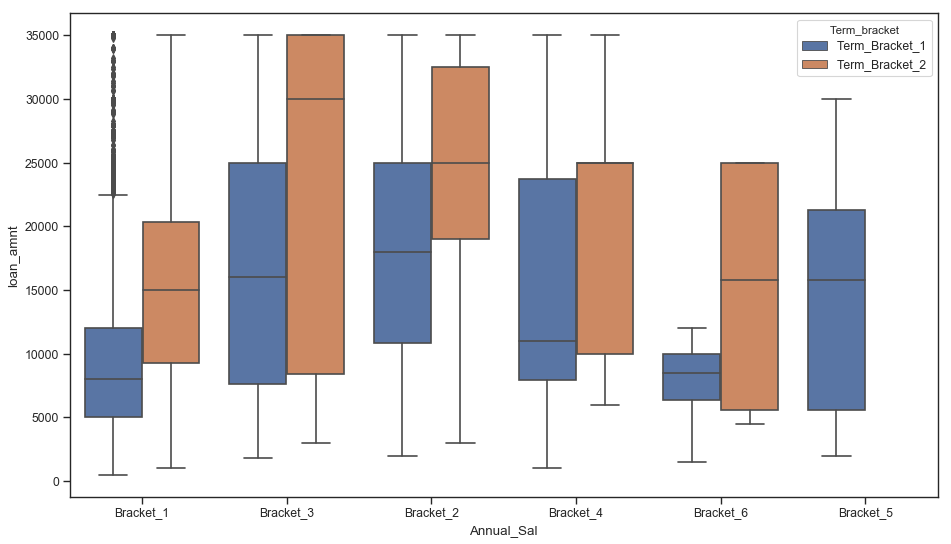

In [108]:

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Annual_Sal', y='loan_amnt', hue='Term_bracket', data=loan)
plt.show()

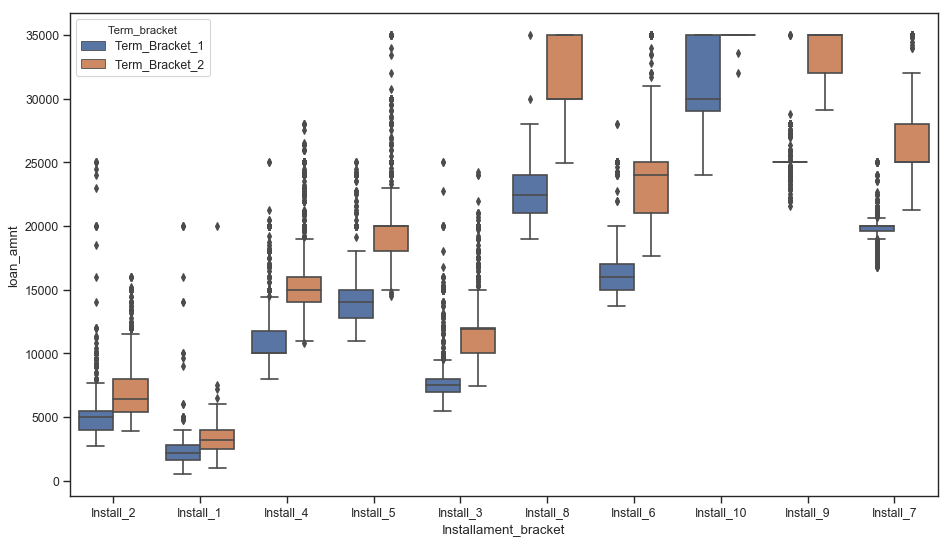

In [109]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Installament_bracket', y='loan_amnt', hue='Term_bracket', data=loan)
plt.show()

In [110]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Term_bracket,Installament_bracket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_1,Install_2
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_2,Install_1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_1,Install_1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Term_Bracket_1,Install_4
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_2,Install_1


Here we are trying to see the impact of term segments on the distribution of loan bracket segment.
Groupby fuction is being used here.

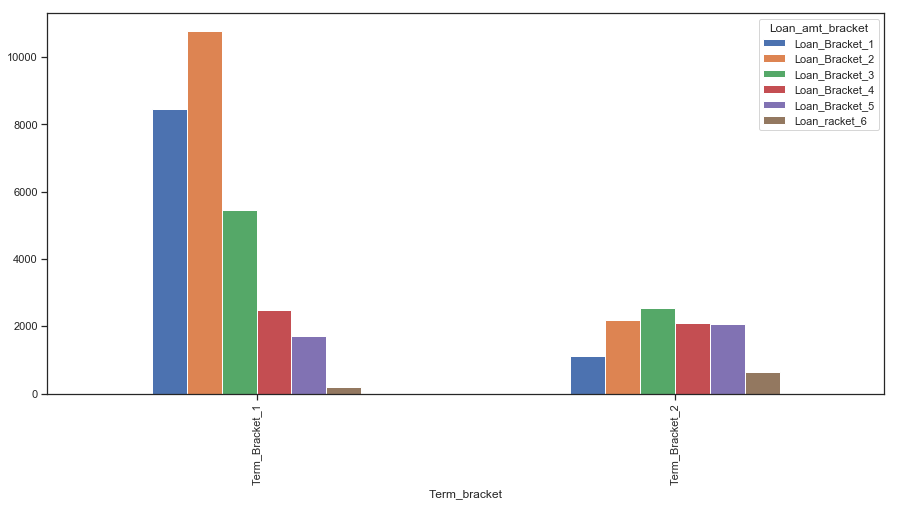

In [111]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Loan_amt_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

Here we are trying to see the impact of term segments on the distribution of installment bracket segment.
Groupby fuction is being used here.

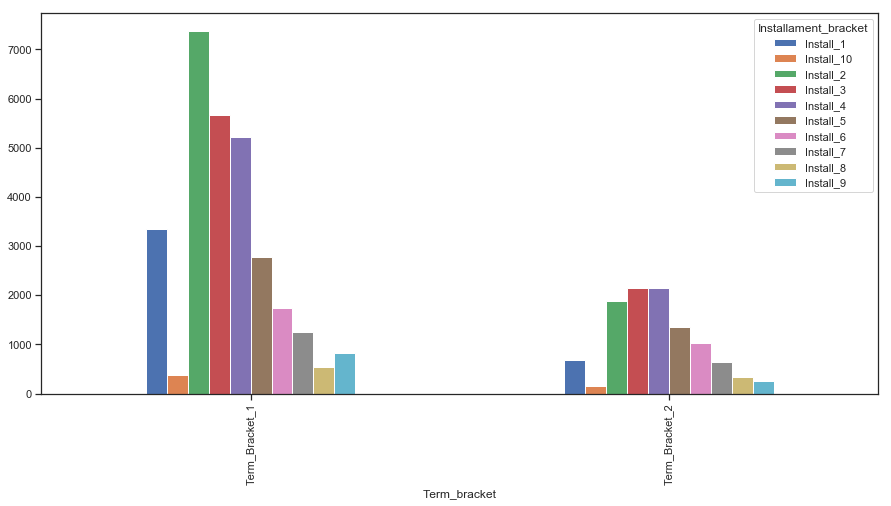

In [114]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

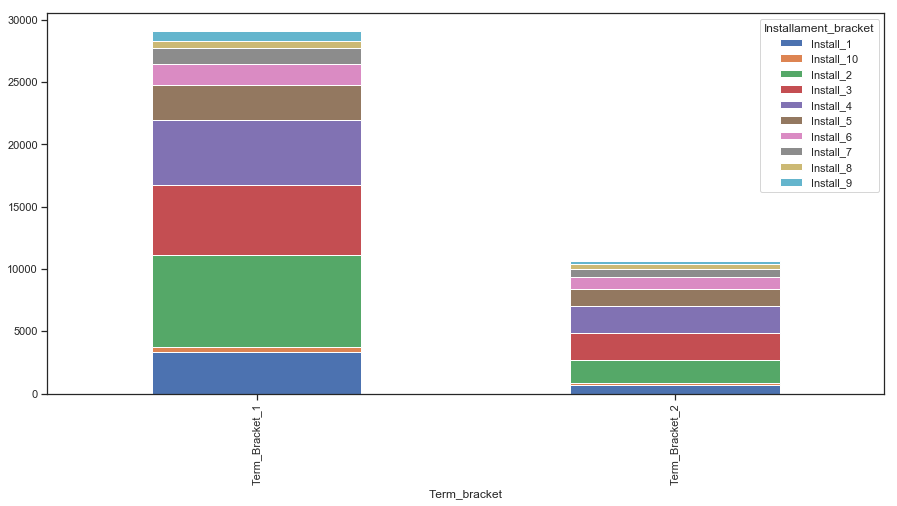

In [115]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar',stacked = True)

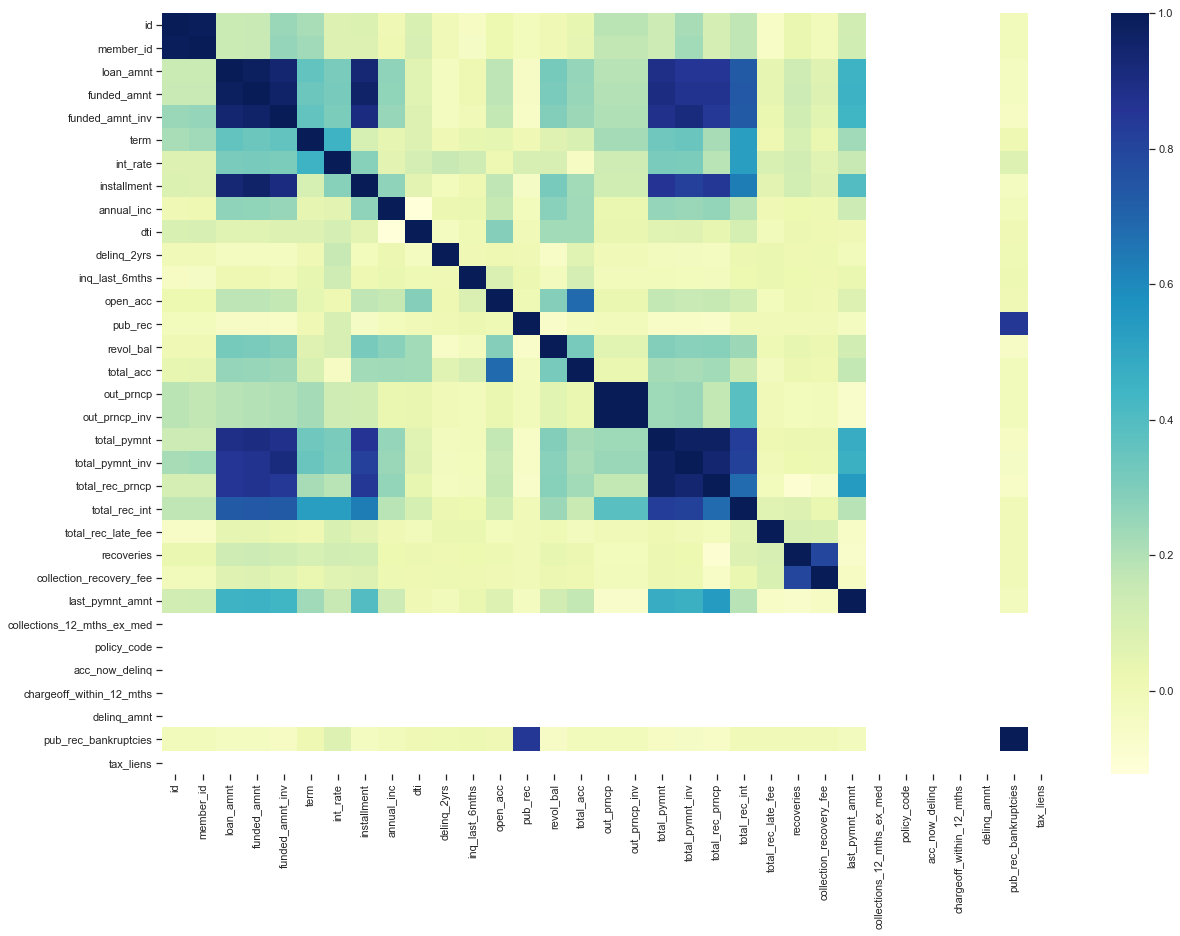

In [84]:
plt.figure(figsize=(20, 14))
sns.heatmap(loan.corr(),cmap="YlGnBu")

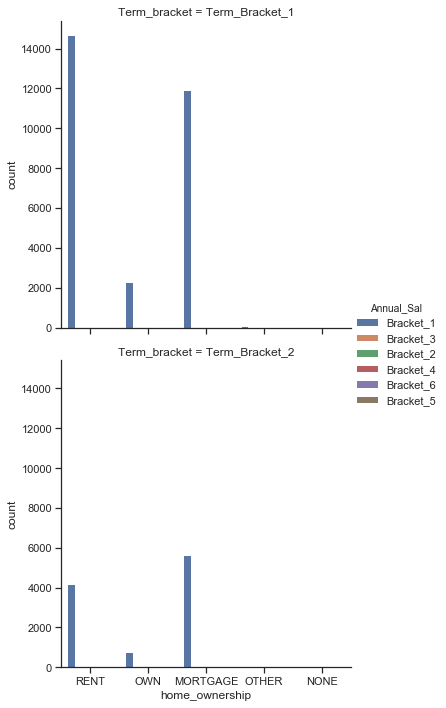

In [98]:
sns.factorplot(x = "home_ownership", hue = "Annual_Sal", row = "Term_bracket", data = loan, kind = "count")